In [37]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [13]:
#loading data
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [14]:
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

In [15]:
#defining model
model=Sequential()

#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

#adding pooling layer
model.add(MaxPool2D(2,2))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))

#adding output layer
model.add(Dense(10,activation='softmax'))

C:\Users\itzme\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
#fitting the model
history1 = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8958 - loss: 0.3549 - val_accuracy: 0.9782 - val_loss: 0.0768
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9810 - loss: 0.0625 - val_accuracy: 0.9804 - val_loss: 0.0626
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9880 - loss: 0.0398 - val_accuracy: 0.9842 - val_loss: 0.0548
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9926 - loss: 0.0247 - val_accuracy: 0.9842 - val_loss: 0.0536
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9837 - val_loss: 0.0587
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9836 - val_loss: 0.0624
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9859 - val_loss: 0.0561
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9979 -

In [18]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9802 - loss: 0.0783


[0.062715545296669, 0.9846000075340271]

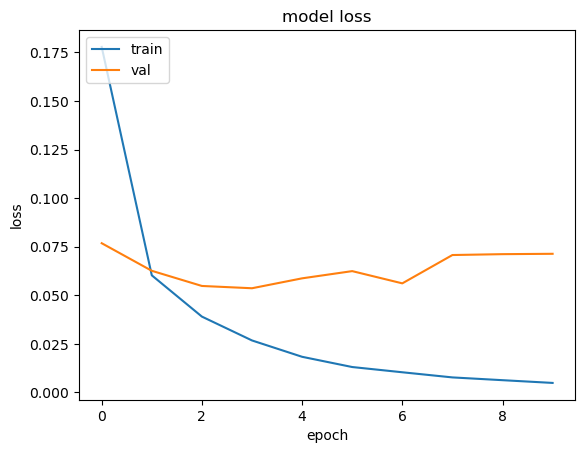

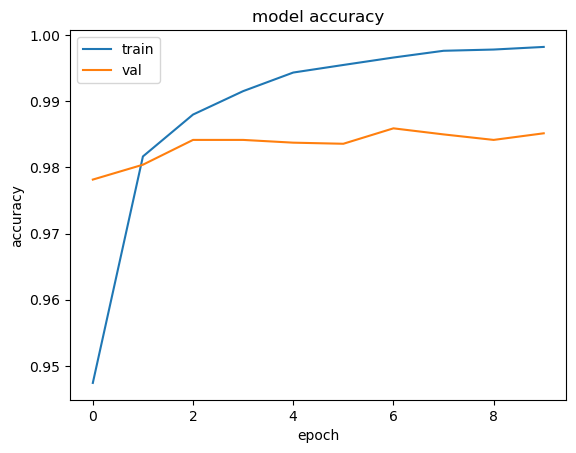

In [19]:
from matplotlib import pyplot as plt
# Show the learning curves
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [27]:
cnn_model = "digits_recognition_cnn.h5"
model.save(cnn_model, save_format='h5')

In [30]:
loaded_model = load_model(cnn_model)

In [33]:
predictions = loaded_model.predict([X_test])
print('predictions : ', predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
predictions :  (10000, 10)


In [35]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,2.856746e-14,1.470192e-12,7.354006e-11,4.566278e-10,1.673325e-14,2.207366e-18,3.081435e-18,1.000000e+00,9.882739e-13,1.135362e-11
1,2.167047e-11,1.127472e-08,1.000000e+00,1.452990e-14,1.205903e-16,1.573231e-17,3.898237e-09,5.508402e-18,3.962753e-09,1.695020e-16
2,7.519163e-10,1.000000e+00,3.902122e-12,1.940076e-15,1.167834e-08,2.726219e-13,6.334146e-11,3.209095e-11,1.564855e-09,1.444944e-11
3,9.999994e-01,1.300039e-14,1.830183e-10,5.540315e-14,1.491175e-11,3.117854e-12,5.571011e-07,6.222182e-15,2.383601e-10,5.335306e-12
4,1.399391e-14,2.450852e-13,1.831749e-13,2.028354e-13,9.999998e-01,4.609956e-20,2.585663e-14,9.240240e-15,1.284061e-09,2.805928e-07
...,...,...,...,...,...,...,...,...,...,...
9995,2.108261e-18,3.517396e-11,1.000000e+00,1.541764e-09,2.619242e-19,7.090905e-22,9.775508e-16,1.471843e-10,4.871733e-09,8.453771e-16
9996,8.325828e-14,1.235105e-13,1.128297e-13,1.000000e+00,8.361208e-17,7.705110e-11,1.575108e-13,4.908047e-14,1.884724e-11,2.446902e-08
9997,7.741378e-26,4.395001e-17,8.810316e-21,9.818387e-21,1.000000e+00,2.728694e-21,4.937565e-19,4.487658e-16,1.924298e-13,8.456509e-13
9998,1.140914e-19,1.451378e-21,7.279803e-22,1.030108e-13,2.693925e-19,9.999999e-01,6.131303e-12,1.492434e-17,9.269576e-08,2.416888e-15


In [38]:
predictions = np.argmax(predictions, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5
